In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


In [2]:

def MTM_3D_plots(MTM_sim_df):
    """
    Creates two 3D scatter plots side by side for each key in the input dictionary.
    - The left plot displays the actual values of 'coll', 'beta', and 'omt'.
    - The right plot displays the percent differences from a reference point.

    Parameters:
    - kymin_data_points_dict (dict): A dictionary with kymin values as keys. Each key has a dictionary
                                    value containing lists of 'coll', 'beta', 'omt', 'Q_EM/Q_ES', and
                                    a 'reference_point' which is itself a dictionary with 'coll', 'beta',
                                    and 'omt' values.
    - debug (bool): If True, prints the kymin value for which the plot is generated.

    Returns:
    - None, but displays the 3D scatter plots.
    """
    kymin_list = MTM_sim_df['kymin'].unique()
    kymin_list = [kymin_list[0]]
    
    norm_Q_ratio = MTM_sim_df['norm_Q_ratio']
    norm_Q_ratio_rescaled = (norm_Q_ratio - norm_Q_ratio.min()) / (norm_Q_ratio.max() - norm_Q_ratio.min())
    
    max_marker_size = 600
    min_marker_size = 80
    MTM_sim_df['resized_Q_ratio'] = (min_marker_size + (max_marker_size - min_marker_size) * norm_Q_ratio_rescaled)
    

    for kymin in kymin_list:

        kymin_df = MTM_sim_df[MTM_sim_df['kymin'] == kymin]

        # Create figure and two 3D subplots
        fig = plt.figure(figsize=(12, 6))
        ax1 = fig.add_subplot(121, projection='3d')  # Actual values plot
        ax2 = fig.add_subplot(122, projection='3d')  # Percent difference plot

        norm_Q_ratio = kymin_df['norm_Q_ratio']
        resized_Q_ratio = kymin_df['resized_Q_ratio']

        ref_coll = kymin_df['ref_coll']
        ref_beta = kymin_df['ref_beta']
        ref_omt2 = kymin_df['ref_omt2']

        coll_array = kymin_df['coll']
        beta_array = kymin_df['beta']
        omt2_array = kymin_df['omt2']

        pd_coll_array = kymin_df['pd_coll']*100
        pd_beta_array = kymin_df['pd_beta']*100
        pd_omt2_array = kymin_df['pd_omt2']*100

        norm = Normalize(vmin=0, vmax=1)
        
        # Plotting the data points for the actual values and perc diff values
        sc1 = ax1.scatter(coll_array, beta_array, omt2_array, 
                          s=resized_Q_ratio, c=norm_Q_ratio, cmap='plasma', edgecolor='black', norm=norm, zorder=1)
        sc2 = ax2.scatter(pd_coll_array, pd_beta_array, pd_omt2_array, 
                          s=resized_Q_ratio, c=norm_Q_ratio, cmap='plasma', edgecolor='black', norm=norm, zorder=1)
        
        # plot points where Q_ES <= Q_EM 
        red_x_indices = norm_Q_ratio > 0.5
        ax1.scatter(coll_array[red_x_indices], beta_array[red_x_indices], omt2_array[red_x_indices],
                    s=resized_Q_ratio[red_x_indices]*0.5, marker='x', color='red', zorder=2, linewidth=2,
                    label=f'Q_ratio > 0.5')
        ax2.scatter(pd_coll_array[red_x_indices], pd_beta_array[red_x_indices], pd_omt2_array[red_x_indices],
                    s=resized_Q_ratio[red_x_indices]*0.5, marker='x', color='red', zorder=2, linewidth=2)
        
        # Highlight the reference data point
        reference_label = 'Reference Sim'
        ref_point_loc = kymin_df[(kymin_df['coll'] == ref_coll) & (kymin_df['beta'] == ref_beta) & (kymin_df['omt2'] == ref_omt2)].index
        if ref_point_loc.any():
            ax1.scatter(coll_array[ref_point_loc], beta_array[ref_point_loc], omt2_array[ref_point_loc], 
                        s=resized_Q_ratio[ref_point_loc]*1.3, edgecolor='red', facecolors='none', linewidth=2,
                        label=reference_label)
            ax2.scatter(pd_coll_array[ref_point_loc], pd_beta_array[ref_point_loc], pd_omt2_array[ref_point_loc], 
                        s=resized_Q_ratio[ref_point_loc]*1.3, edgecolor='red', facecolors='none', linewidth=2)
                
        
        # Adding figure legend label for reference simulation
        legend = fig.legend(loc=(0.32, 0.78), markerscale=2, fontsize=12)
        
        for handle in legend.legendHandles:
            handle._sizes = [300]  # set legend marker size to 100, you can adjust this value

        # Add colorbar
        cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.6])  # positioning the colorbar
        cbar = fig.colorbar(sc1, cax=cbar_ax)
        cbar.set_label(r'$Q_{EM}/(Q_{ES} - Q_{EM})$', fontsize=14)
        
        # Set titles and labels for both plots
        ax1.set_title('Kymin = ' + str(kymin))
        ax1.set_xlabel('Coll', labelpad=20, size=15)
        ax1.set_ylabel('Beta', labelpad=25, size=15)
        ax1.set_zlabel('Omt (elec)', labelpad=10, size=15)
        # Adjusting x and y axis label angles
        ax1.tick_params(axis='x', labelrotation=30)
        ax1.tick_params(axis='y', labelrotation=-45)

        ax2.set_title('Kymin = ' + str(kymin) + ' (Percent Difference)')
        ax2.set_xlabel('Coll (perc diff)', size=15)
        ax2.set_ylabel('Beta (perc diff)', size=15)
        ax2.set_zlabel('Omt (elec) (perc diff)', size=15)

        plt.subplots_adjust(right=0.85)  # Adjust layout
        plt.show()




/tmp/ipykernel_356195/180507371.py:82: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


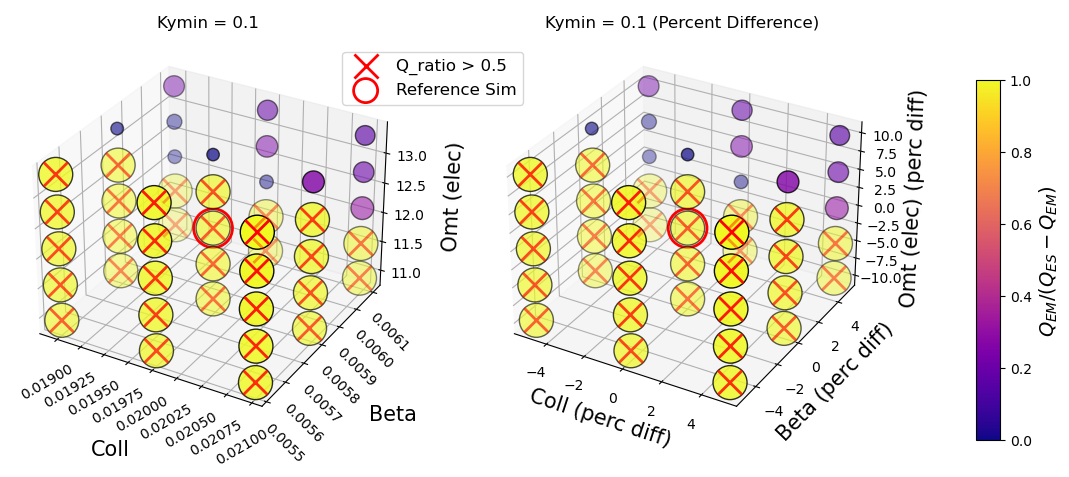

In [3]:
filepath = '/pscratch/sd/j/joeschm/NSXTU_discharges/129038/r_0.909990_OM_top/MTM_limit'

csv_filepath = os.path.join(filepath, 'simulation_data.csv')

MTM_sim_df = pd.read_csv(csv_filepath)


MTM_3D_plots(MTM_sim_df)


In [44]:
import math


def round_sigfigs(number, num_dig:int=2):
    if number == 0:
        return 0.0
    else:
        magnitude = 10.0 ** (num_dig - int(math.floor(math.log10(abs(number)))) - 1)
        return round(number, int(magnitude))

In [47]:
round_sigfigs(0.01925)

0.01925

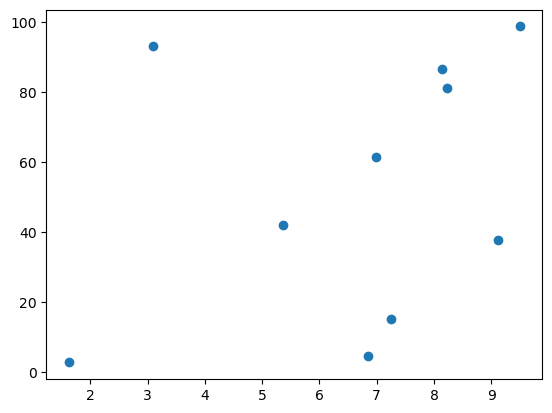

In [50]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 10

x0 = 1
x = np.random.rand(num_points, 1) * 10
y = np.random.rand(num_points, 1) * 100

# Calculate percent difference from x0
x_pd = ((x - x0) / x0) * 100

# Create the plot
fig, ax = plt.subplots()
scatter = ax.scatter(x, y)

plt.show()
